<a href="https://colab.research.google.com/github/akshithamaddi/Akshitha_INFO5731_Spring2020/blob/master/5502_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

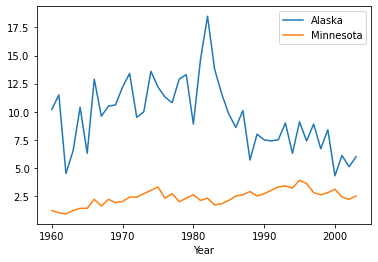

In [2]:
#1.2 Line plot for murder rates in alaska and minnesota 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("crime_rates.csv") 
df1 = df[['State','Year','Murder Rate']]
ak1=df1.loc[df1['State'] == 'Alaska']
akr = ak1.rename(columns = {'Murder Rate':'Alaska'}) 
ak = akr.drop('State', axis=1)
mn1=df1.loc[df1['State'] == 'Minnesota'].reset_index()
mnr = mn1.rename(columns = {'Murder Rate':'Minnesota'}) 
mns = mnr.drop('State', axis=1)
mni = mns.drop('index', axis=1)
mn = mni.drop('Year', axis = 1)
ak_mn = ak.join(mn)
#Plotting a graph
ak_mn.plot("Year")

In [0]:
#1.3 highest murder rates in a year
df2=df[['State','Year','Murder Rate']]
def most_murderous(year):
 grouped_df = df2.groupby('Year')  
 groupbyyear=grouped_df.get_group(year) 
 sortedvalues=groupbyyear.sort_values('Murder Rate',ascending=False).head(5)
 print(sortedvalues)
 #array of states in the increasing order of murder rates
 t_array = np.asarray(sortedvalues['State']) 
 print(t_array)
 #horizontal plot 
 sortedvalues.plot(kind='barh',x='State',y='Murder Rate',color = "darkmagenta",width = 0.8)

            State  Year  Murder Rate
783     Louisiana  1995         17.0
1091  Mississippi  1995         12.9
1575     Oklahoma  1995         12.2
871      Maryland  1995         11.8
211    California  1995         11.2
['Louisiana' 'Mississippi' 'Oklahoma' 'Maryland' 'California']


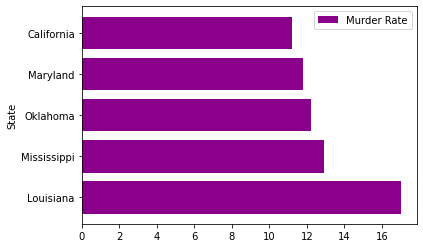

In [4]:
most_murderous(1995)

In [4]:
 #1.4 murder rates in California in 1988 than in 1975
df3 = df[['State','Year','Population','Murder Rate']]
#california murders in 1988
Californiamurderratein1988 = df3[(df3['State']=='California') & (df3['Year']==1988)].reset_index()
murdersin1988 = (Californiamurderratein1988['Population']*Californiamurderratein1988['Murder Rate'])/100000
#california murders in 1975
Californiamurderratein1975 = df3[(df3['State']=='California') & (df3['Year']==1975)].reset_index()
murdersin1975 = (Californiamurderratein1975['Population']*Californiamurderratein1975['Murder Rate'])/100000
#people murdered in california in 1988 than in 1975
ca_change=murdersin1988[0]-murdersin1975[0]
print("People murdered in 1988 than in 1975 are",round(ca_change))

People murdered in 1988 than in 1975 are 726.0


In [5]:
#2.1 Two year period changes for the murder rates in each state 
import pandas as pd
import numpy as np
from matplotlib import pyplot
from datascience import Table
crime_data=df[['State','Year','Murder Rate']]
changes_by_state = []
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]
def two_year_changes (values):
    pos=0
    neg=0
    differences = diff_n(values, 2)
    for temp in range(len(np.array(values)[2:])):
      if differences[temp] > 0:
          pos=pos+1
      if differences[temp] < 0:
          neg = neg+1
    return pos-neg    
for state_one in crime_data['State'].unique():
       years=crime_data[crime_data['State']==state_one]['Year'].tolist()
       rates=crime_data[crime_data['State']==state_one]['Murder Rate'].tolist()
       changes_by_state.append(two_year_changes(rates))
print(changes_by_state)
murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
ak = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
mn = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')
print('Alaska:',    two_year_changes(ak.column('Murder rate in Alaska')))
print('Minnesota:', two_year_changes(mn.column('Murder rate in Minnesota')))


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


[-5, -6, -1, 1, 17, -4, 4, -3, -6, -3, -2, 4, -3, 8, 5, 5, -6, 8, 2, 9, 5, -4, 6, 0, -2, 0, -10, 1, 5, -3, 10, -1, 5, 3, 3, 1, -1, 5, 6, -11, -3, -2, 2, 5, -8, -1, 6, 1, 3, 0]
Alaska: -5
Minnesota: 6


In [6]:
#2.2 Table with a state name and murder rate change
df4 = pd.DataFrame(columns=['State', 'Murder Rate two_year_changes']);
df4['State'] = df3['State'].unique()
df4['Murder Rate two_year_changes'] = changes_by_state
df4

,State,Murder Rate two_year_changes
0,Alaska,-5
1,Alabama,-6
2,Arkansas,-1
3,Arizona,1
4,California,17
5,Colorado,-4
6,Connecticut,4
7,Delaware,-3
8,Florida,-6
9,Georgia,-3


In [7]:
#2.3 Total changes in increase and decrease of murder rates for all the states 
pos_count, neg_count = 0, 0  
for num in changes_by_state:       
    if num >= 0: 
        pos_count += 1
    else: 
        neg_count += 1         
total_changes = pos_count - neg_count
print('Total increases minus total decreases, across all states and years:', total_changes)

Total increases minus total decreases, across all states and years: 8


In [8]:
# 2.4 Number of different two year periods
num_change = []
for single_state in df3['State'].unique():
  murder_rates=df3[df3['State']==single_state]
  year=murder_rates['Year']
  num_change.append(len(np.array(year)[2:]-np.array(year)[:-2]))
print("Number of different two year Periods :",sum(num_change)) 

Number of different two year Periods : 2100


In [0]:
#2.6&2.7

In [13]:
#3.3 
df3 = df[['State','Year','Population','Murder Rate']]
death_penalty_murder_rates = df3.loc[(df3['State'] != 'Alaska')&(df3['State'] != 'Hawaii')&(df3['State'] != 'Maine')&
                                     (df3['State'] != 'Michigan')&(df3['State'] != 'Wisconsin')&(df3['State'] != 'Minnesota')]
death_penalty_murder_rates

,State,Year,Population,Murder Rate
44,Alabama,1960,3266740,12.4
45,Alabama,1961,3302000,12.9
46,Alabama,1962,3358000,9.4
47,Alabama,1963,3347000,10.2
48,Alabama,1964,3407000,9.3
...,...,...,...,...
2195,Wyoming,1999,480000,2.3
2196,Wyoming,2000,493782,2.4
2197,Wyoming,2001,494423,1.8
2198,Wyoming,2002,498830,3.0


In [44]:
#3.4
u=death_penalty_murder_rates['State'].unique()
df4 = death_penalty_murder_rates.loc[(df3['Year'] == 1971)].reset_index()[['Murder Rate']]
year1971=df4.rename(columns={'Murder Rate':'Murder rate in 1971'})
df4 = death_penalty_murder_rates.loc[(df3['Year'] == 1973)].reset_index()[['Murder Rate']]
year1973=df4.rename(columns={'Murder Rate':'Murder rate in 1973'})
diffyear=pd.DataFrame(u)
diffyear[1971]=year1971
diffyear[1973]=year1973
diffyear['Diff']=diffyear[1973]-diffyear[1971]
diffyearlist = diffyear['Diff'].tolist()
pos_count, neg_count = 0, 0  
for num in diffyearlist:       
    if num >= 0: 
        pos_count += 1
    else: 
        neg_count += 1         
changes_72 = pos_count - neg_count
print('Increases minus decreases from 1971 to 1973:', changes_72)


Increases minus decreases from 1971 to 1973: 22
